In [27]:
import GPy
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.transforms import ToUndirected
from torch_geometric.utils import to_undirected
from torch_geometric_temporal.signal import temporal_signal_split
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
seed = 42
torch.manual_seed(seed)
torch.random.manual_seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
%config InlineBackend.figure_format = 'retina'


torch.Size([5, 1]) torch.Size([5, 1]) torch.Size([5, 1])


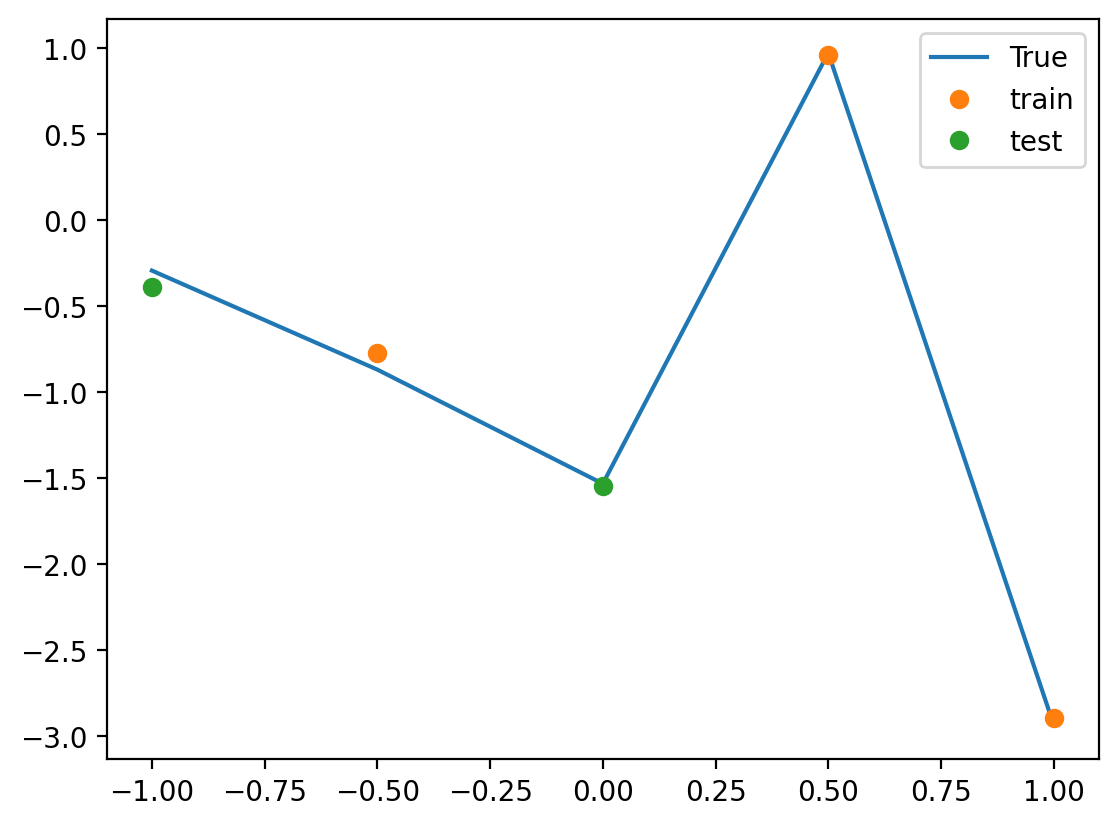

In [32]:
np.random.seed(0)
torch.random.manual_seed(4)

N = 5
x = np.linspace(-1, 1, N).reshape(-1, 1)
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=0.1)
y = np.random.multivariate_normal(np.zeros(N), kernel.K(x)).reshape(-1, 1)
y_noisy = y + np.random.normal(0, 0.1, N).reshape(-1, 1)

train_x, test_x, train_y, test_y = train_test_split(x, y_noisy, test_size=0.4, random_state=0)

plt.plot(x, y, label="True");
plt.plot(train_x, train_y, 'o', label='train')
plt.plot(test_x, test_y, 'o', label='test')
plt.legend();

x, y, y_noisy = map(lambda x: torch.tensor(x).float().to(device), (x, y, y_noisy))
train_x, test_x, train_y, test_y = map(lambda x: torch.tensor(x).float().to(device), (train_x, test_x, train_y, test_y))
print(x.shape, y.shape, y_noisy.shape)